In [1]:
pip install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 13.7 MB/s eta 0:00:00
  Attempting uninstall: typer
    Found existing installation: typer 0.7.0
    Uninstalling typer-0.7.0:
      Successfully uninstalled typer-0.7.0
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.


In [2]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

#Importing Libraries clustering
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from fcmeans import FCM
from sklearn.mixture import GaussianMixture

#Libraries for recommendation system
from sklearn.pipeline import Pipeline
from sklearn.metrics.pairwise import euclidean_distances
from collections import defaultdict

import warnings
warnings.filterwarnings("ignore")

##Read data from github

In [3]:
data = pd.read_csv("https://github.com/Umadevi65B/Spotify_data/blob/main/data_spotofy.zip?raw=true",  compression='zip')

## Data Cleaning

In [4]:
print(data.shape)

(170653, 19)


In [5]:
# Drop Null Values
data.dropna()
print(data.shape)

(170653, 19)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

## Clustering Algorithms

In [7]:
df_num = data.select_dtypes(np.number)

In [8]:
# Standard Scalar

std_sc = StandardScaler()
x_scaled = std_sc.fit_transform(df_num.values)
df_scaled = pd.DataFrame(x_scaled, columns=df_num.columns)

# PCA

pca = PCA(n_components=2)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)

In [9]:
# Defining dataset to store clustering prediction

data_km = data.copy()
data_mbkm = data.copy()
data_fcm = data.copy()
data_gm = data.copy()

#### Kmeans Clustering

In [10]:
km = KMeans(n_clusters=9, verbose=2)
km = km.fit(df_pca)

Initialization complete
Iteration 0, inertia 148103.8407187679.
Iteration 1, inertia 132296.30511174857.
Iteration 2, inertia 130423.45726593345.
Iteration 3, inertia 129473.45526276204.
Iteration 4, inertia 128713.03579289772.
Iteration 5, inertia 128036.2915718313.
Iteration 6, inertia 127414.38285164622.
Iteration 7, inertia 126838.23086698944.
Iteration 8, inertia 126326.03264311902.
Iteration 9, inertia 125904.36034023121.
Iteration 10, inertia 125561.12623484869.
Iteration 11, inertia 125268.05337935034.
Iteration 12, inertia 125008.49676183154.
Iteration 13, inertia 124774.58660301851.
Iteration 14, inertia 124568.40537919465.
Iteration 15, inertia 124387.98130748786.
Iteration 16, inertia 124236.18924356715.
Iteration 17, inertia 124098.55071683024.
Iteration 18, inertia 123964.97867377821.
Iteration 19, inertia 123829.14293624878.
Iteration 20, inertia 123707.88890163723.
Iteration 21, inertia 123601.02986575826.
Iteration 22, inertia 123503.45445719722.
Iteration 23, inertia 

In [11]:
data_km['cluster_label'] = km.predict(df_pca)
acc_km = metrics.calinski_harabasz_score(df_pca, data_km['cluster_label'])

In [12]:
print(acc_km)

150718.02171035172


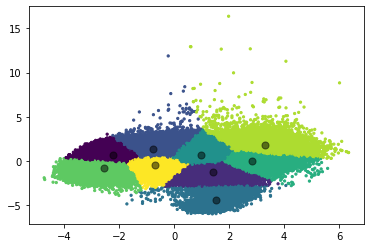

In [ ]:
# Kmeans Clustering Plot
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=data_km['cluster_label'], s=5, cmap='viridis')

centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', alpha=0.5, s=50)
plt.show()

#### Mini-Batch Kmeans Clustering

In [ ]:
mbkm = MiniBatchKMeans(n_clusters=8,random_state=23,batch_size=32)
mbkm.fit(df_pca)

MiniBatchKMeans(batch_size=32, random_state=23)

In [ ]:
data_mbkm['cluster_label'] = mbkm.predict(df_pca)
acc_mbk = metrics.calinski_harabasz_score(df_pca, data_mbkm['cluster_label'])

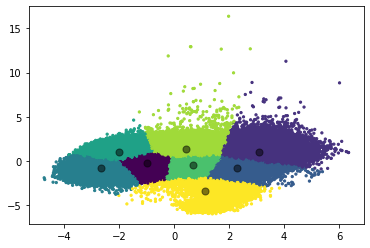

In [ ]:
# Mini-Batch Kmeans Clustering Clustering Plot
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=data_mbkm['cluster_label'], s=5, cmap='viridis')

centers = mbkm.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', alpha=0.5, s=50)
plt.show()

#### Fuzzy C Mean Clustering

In [ ]:
fcm = FCM(n_clusters=8)
fcm.fit(df_pca)

In [ ]:
data_fcm['cluster_label'] = fcm.predict(df_pca)
acc_fcm = metrics.calinski_harabasz_score(df_pca, data_fcm['cluster_label'])

#### Gausian Mixture Model

In [ ]:
gm = GaussianMixture(n_components=7, random_state=23)
gm.fit(df_pca)

GaussianMixture(n_components=7, random_state=23)

In [ ]:
data_gm['cluster_label'] = gm.predict(df_pca)
acc_gm = metrics.calinski_harabasz_score(df_pca, data_gm['cluster_label'])

#### Accuracy comparision of different clustering algorithms

In [ ]:
# Creating a dictionary 
acc_dict = {}

# Adding Values
acc_dict['K means'] = acc_km
acc_dict['Mini batch Kmeans'] = acc_mbk
acc_dict['Fuzzy C'] = acc_fcm
acc_dict['Gausian Mixture'] = acc_gm

In [ ]:
#Creating a dataframe of accuracies
acc_df = pd.DataFrame(acc_dict.items(), columns = ['Clustering_models','Accuracy_Score'])
acc_df

,Clustering_models,Accuracy_Score
0,K means,150729.802084
1,Mini batch Kmeans,144061.344351
2,Fuzzy C,149354.144696
3,Gausian Mixture,145049.704778


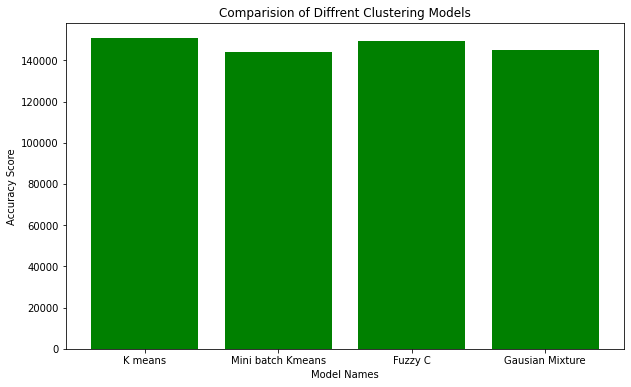

In [ ]:
# Plotting of accuracies.
plt.figure(figsize=(10, 6))

plt.bar(acc_df['Clustering_models'], acc_df['Accuracy_Score'], color= 'green')
plt.title('Comparision of Diffrent Clustering Models')
plt.xlabel('Model Names')
plt.ylabel('Accuracy Score')
plt.grid(False)

plt.show()	

## Music Recommender

In [ ]:
# Music dataset columns with datatype as float.
features = df_num.columns
input_data = data[features]

In [ ]:
# km = KMeans(n_clusters=9, verbose=2)

In [ ]:
# Using Kmeans since it is giving best accuracy score
songs_cluster_km = Pipeline([('scaler', StandardScaler()), ('kmeans', km)], verbose=True)

# Fitting the model
songs_cluster_km.fit(input_data)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
Initialization complete
Iteration 0, inertia 1944820.3108041165
Iteration 1, inertia 1430609.6415260355
Iteration 2, inertia 1416311.263116018
Iteration 3, inertia 1412193.508041136
Iteration 4, inertia 1408891.595485173
Iteration 5, inertia 1405202.2162908004
Iteration 6, inertia 1400791.2138095987
Iteration 7, inertia 1395670.5180773125
Iteration 8, inertia 1390333.515350252
Iteration 9, inertia 1386003.7167463729
Iteration 10, inertia 1382371.9060796732
Iteration 11, inertia 1378575.6093676211
Iteration 12, inertia 1374230.1514405343
Iteration 13, inertia 1369403.6739848144
Iteration 14, inertia 1364203.3896514794
Iteration 15, inertia 1359300.7857280131
Iteration 16, inertia 1355393.2884542928
Iteration 17, inertia 1352545.5078914633
Iteration 18, inertia 1350691.105113249
Iteration 19, inertia 1349634.2715912694
Iteration 20, inertia 1349017.719720602
Iteration 21, inertia 1348689.3433359251
Iteration 22, inert

Pipeline(steps=[('scaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=9, verbose=2))],
         verbose=True)

In [ ]:
def Music_Recommender(input_songs, music_data, num_songs=10):
    ''' The function for Music Recommendation Systen based on K-means clustering'''

    music_vectors = []

    # Input Processing
    for song in input_songs:
        try:
            tracks_data = music_data[(music_data['name'] == song['name']) & 
                                (music_data['year'] == song['year'])].iloc[0]
        
        except IndexError:
            tracks_data = None

            # Wanrning Message
            print('Warning: The song', song['name'], 'does not exist in our database.')
            continue
   
        music_vectors.append(tracks_data[features].values)
    
    music_array = np.array(music_vectors)
    music_center = np.mean(music_array, axis=0)
    
    # Cluster of input songs
    km_cluster = songs_cluster_km.steps[0][1]
    scaled_data = km_cluster.transform(music_data[features])
    scaled_music_center = km_cluster.transform(music_center.reshape(1, -1))
    
    ed = euclidean_distances(scaled_music_center, scaled_data)
    
    index = list(np.argsort(ed)[:,:num_songs][0])
    music_output = music_data.iloc[index]

    # Return ouput
    print("Recommended Songs")
    return music_output[col_returned]

In [ ]:
col_returned = ['year', 'name', 'artists']

In [ ]:
# Input Songs
songs_list_1 = [{'name': 'Clancy Lowered the Boom', 'year': 1921},
                {'name': 'Outta Time (feat. Drake)', 'year': 2020},
                {'name': 'Come As You Are', 'year':1991},
                {'name': 'Danny Boy', 'year': 1921},
                {'name': 'Lithium', 'year': 1992}]

songs_list_2 = [{'name': 'Toosie Slide', 'year': 2020},
                {'name': 'Of Wolf And Man', 'year': 1991},
                {'name': 'Somebody Like You', 'year': 2002}]

In [ ]:
Music_Recommender(songs_list_1, data)

Recommended Songs


,year,name,artists
10592,1974,My Man - 2013 Remaster,['Eagles']
114670,1969,Do What You Gotta Do,['Four Tops']
82412,1970,A Most Disgusting Song,['Rodríguez']
48024,1974,In My Hour of Darkness - Remaster,['Gram Parsons']
27051,1962,Teardrops,['Frankie Valli & The Four Seasons']
47801,1973,Tie a Yellow Ribbon Round the Ole Oak Tree (fe...,"['The Dawn', 'Tony Orlando']"
49200,1980,Forty Hour Week (For a Livin'),['Alabama']
47980,1973,You're My Home,['Billy Joel']
64306,1966,Can I Get A Witness - Alternate Vocal,['The Supremes']
131497,1973,Bein' Green,['Van Morrison']


In [ ]:
Music_Recommender(songs_list_2, data)

Recommended Songs


,year,name,artists
153108,2007,Bolero Falaz,['Aterciopelados']
52308,1995,Bolero Falaz,['Aterciopelados']
74424,2016,Marinade,['DOPE LEMON']
52359,1995,Joyride - Single Version,['Roxette']
16906,2006,White Trash Story,['Casey Donahew']
54514,2006,Upside Down,['Jack Johnson']
36142,2008,Gives You Hell,['The All-American Rejects']
17300,2008,Mayonaka no Door / Stay With Me,['Miki Matsubara']
17063,2007,With You,['Chris Brown']
17211,2008,Gives You Hell,['The All-American Rejects']
